In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
df=pd.read_csv("Churn_Modelling.csv")
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,42,2,0.00,1,1,1,101348.88,1
1,608,41,1,83807.86,1,0,1,112542.58,0
2,502,42,8,159660.80,3,1,0,113931.57,1
3,699,39,1,0.00,2,0,0,93826.63,0
4,850,43,2,125510.82,1,1,1,79084.10,0


In [92]:
df.isnull().sum()

CreditScore        0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [93]:
input_data=df.iloc[:,:-1]
output_data=df.iloc[:,-1]

In [94]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [95]:
ss=StandardScaler()
input_data=pd.DataFrame(ss.fit_transform(input_data),columns=input_data.columns)
input_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.326221,0.293517,-1.041760,-1.225848,-0.911583,0.646092,0.970243,0.021886
1,-0.440036,0.198164,-1.387538,0.117350,-0.911583,-1.547768,0.970243,0.216534
2,-1.536794,0.293517,1.032908,1.333053,2.527057,0.646092,-1.030670,0.240687
3,0.501521,0.007457,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,-0.108918
4,2.063884,0.388871,-1.041760,0.785728,-0.911583,0.646092,0.970243,-0.365276
...,...,...,...,...,...,...,...,...
9995,1.246488,0.007457,-0.004426,-1.225848,0.807737,0.646092,-1.030670,-0.066419
9996,-1.391939,-0.373958,1.724464,-0.306379,-0.911583,0.646092,0.970243,0.027988
9997,0.604988,-0.278604,0.687130,-1.225848,-0.911583,-1.547768,0.970243,-1.008643
9998,1.256835,0.293517,-0.695982,-0.022608,0.807737,0.646092,-1.030670,-0.125231


In [120]:
X_train, X_test, y_train, y_test = train_test_split(input_data,output_data, test_size=0.2, random_state=10)    # 42 is good but  i take 10 to overcome overfitting

In [168]:
import tensorflow
from keras.layers import Dense
from keras.models import Sequential
from keras.regularizers import L2
from keras.layers import Dense,BatchNormalization,Dropout

In [122]:
ann=Sequential()

In [123]:
input_data.shape

(10000, 8)

In [124]:
X_train.shape

(8000, 8)

In [ ]:
ann.add(Dense(6,input_dim=8,activation="relu"))    #   for regulzriation    kernel_regularizer=L2(L2=0.01)
# ann.add(BatchNormalization())                     # for batch normalization
# ann.add(Dropout(0.5))                         For Dropout Layer
ann.add(Dense(4,activation="relu"))
# ann.add(BatchNormalization())
# ann.add(Dropout(0.5))                         For Dropout Layer
ann.add(Dense(2,activation="relu"))
# ann.add(BatchNormalization())
# ann.add(Dropout(0.5))                         For Dropout Layer
ann.add(Dense(1,activation="sigmoid"))


c:\Users\T460\AppData\Local\Programs\Python\Python313\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [126]:
ann.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [127]:
ann.fit(X_train,y_train,batch_size=100,epochs=50)

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.7262 - loss: 0.6862
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7980 - loss: 0.6565
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7981 - loss: 0.6140
Epoch 4/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7981 - loss: 0.5424
Epoch 5/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7981 - loss: 0.4801
Epoch 6/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7981 - loss: 0.4523
Epoch 7/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7981 - loss: 0.4396
Epoch 8/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7981 - loss: 0.4310
Epoch 9/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7981 - loss: 0.4236
Epoch 10/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7981 - loss: 0.4175
Epoch 11/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7981 - loss: 0.4120
Epoch 12/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7981 - lo

In [128]:
prd=ann.predict(X_test)
prd

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


array([[0.2792187 ],
       [0.4414149 ],
       [0.570698  ],
       ...,
       [0.17763922],
       [0.27765587],
       [0.67625976]], shape=(2000, 1), dtype=float32)

In [129]:
prd_data=[]
for i in prd:
    if i[0]>0.5:
        prd_data.append(1)
    else:
        prd_data.append(0)    

In [130]:
prd1=ann.predict(X_train)
prd1

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.33231065],
       [0.2747373 ],
       [0.04036441],
       ...,
       [0.2344925 ],
       [0.2262496 ],
       [0.34495816]], shape=(8000, 1), dtype=float32)

In [131]:
prd1_data=[]
for i in prd1:
    if i[0]>0.5:
        prd1_data.append(1)
    else:
        prd1_data.append(0)  

In [132]:
from sklearn.metrics import accuracy_score

In [133]:
accuracy_score(y_test,prd_data)*100

85.0

In [134]:
accuracy_score(y_train,prd1_data)*100

85.75

In [135]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
937,2.063884,0.484225,-0.004426,0.835324,-0.911583,-1.547768,0.970243,1.234723
9355,0.915392,0.102810,1.032908,-1.225848,-0.911583,0.646092,-1.030670,1.164024
2293,0.398053,0.579578,-1.733315,-0.299734,-0.911583,0.646092,-1.030670,1.699145
192,-1.774770,0.102810,-1.387538,-1.225848,0.807737,-1.547768,-1.030670,0.259204
8675,0.656722,1.437761,0.687130,0.795384,-0.911583,0.646092,-1.030670,0.220617
...,...,...,...,...,...,...,...,...
5624,-0.346915,0.579578,-1.387538,-1.225848,-0.911583,0.646092,-1.030670,0.751341
6005,-0.150326,-1.422847,1.378686,-1.225848,0.807737,-1.547768,0.970243,-1.065242
987,-0.843560,-0.469311,-1.733315,1.207697,-0.911583,0.646092,-1.030670,0.038422
6152,-1.474714,2.391296,-1.041760,-1.225848,-0.911583,0.646092,0.970243,-1.634803


In [136]:
# prd=ann.predict([[-0.564197,-0.660018,-0.695982,0.324119,0.807737,-1.547768,-1.030670,-1.013811]])
# prd_data=[]
# for i in prd:
#     if i[0]>0.5:
#         prd_data.append(1)
#     else:
#         prd_data.append(0)   
# prd_data         

In [156]:
# Overfitting 
from keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

In [157]:
ann.fit(X_train,y_train,batch_size=100,epochs=50,validation_data=(X_test,y_test),callbacks=EarlyStopping())

Epoch 1/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.8583 - loss: 0.3515 - val_accuracy: 0.8535 - val_loss: 0.3676
Epoch 2/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8574 - loss: 0.3512 - val_accuracy: 0.8515 - val_loss: 0.3670
Epoch 3/50
80/80 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.8585 - loss: 0.3511 - val_accuracy: 0.8525 - val_loss: 0.3673


In [158]:
ann.history.history

{'accuracy': [0.8582500219345093, 0.8573750257492065, 0.8585000038146973],
 'loss': [0.35146433115005493, 0.3512429893016815, 0.35108068585395813],
 'val_accuracy': [0.8535000085830688, 0.8514999747276306, 0.8525000214576721],
 'val_loss': [0.36761531233787537, 0.36703288555145264, 0.36730313301086426]}

In [159]:
train_accuracy=ann.history.history["accuracy"]
test_accuracy=ann.history.history["val_accuracy"]
len(test_accuracy)

3

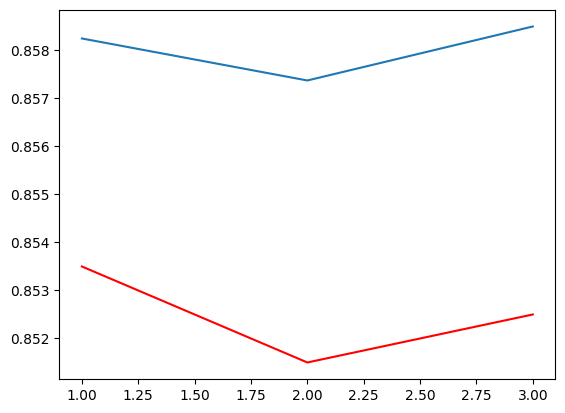

In [162]:
plt.plot([i for i in range(1,4)],train_accuracy)
plt.plot([i for i in range(1,4)],test_accuracy,c='red')
plt.show()

In [163]:
prd=ann.predict(X_test)
prd_data=[]
for i in prd:
    if i[0]>0.5:
        prd_data.append(1)
    else:
        prd_data.append(0) 

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [164]:
prd1=ann.predict(X_train)
prd1_data=[]
for i in prd1:
    if i[0]>0.5:
        prd1_data.append(1)
    else:
        prd1_data.append(0) 

250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [165]:
accuracy_score(y_test,prd_data)*100

85.25

In [166]:
accuracy_score(y_train,prd1_data)*100

85.8375